In [1]:
# All from https://github.com/JeremyCCHsu/Python-Wrapper-for-World-Vocoder/blob/3a7c99a32c717deb8e66bde64b5e60b1a4afce79/demo/demo.py
# License: MIT

from __future__ import division, print_function

import os
from shutil import rmtree
import argparse

import numpy as np

import matplotlib      # Remove this line if you don't need them
matplotlib.use('Agg')  # Remove this line if you don't need them
import matplotlib.pyplot as plt

import soundfile as sf
# import librosa
import pyworld as pw

In [9]:
if os.path.isdir('/tmp/test'):
    rmtree('/tmp/test')
os.mkdir('/tmp/test')

In [234]:
# x is the raw samples from the read sound file
input_file = '/home/casey/Python-Wrapper-for-World-Vocoder/demo/utterance/sing.wav'
input_file_2 = '/home/casey/Python-Wrapper-for-World-Vocoder/demo/utterance/spooky.wav'
x, fs = sf.read(input_file)
x = x[:min(len(x), len(x2))]
x2, fs2 = sf.read(input_file_2)
x2 = x2[:min(len(x), len(x2))]

In [235]:
import IPython.display as ipd
ipd.Audio(x, rate=44_100)

In [236]:
ipd.Audio(x2, rate=44_100)

In [237]:
# defaults from demo arg parsing
frame_period = 5
speed = 1

# 2-1 Without F0 refinement
_f0, t = pw.dio(x, fs, f0_floor=50.0, f0_ceil=600.0,
                channels_in_octave=2,
                frame_period=frame_period,
                speed=speed)
_sp = pw.cheaptrick(x, _f0, t, fs)
_ap = pw.d4c(x, _f0, t, fs)

_f02, t2 = pw.dio(x2, fs2, f0_floor=50.0, f0_ceil=600.0,
                channels_in_octave=2,
                frame_period=frame_period,
                speed=speed)
_sp2 = pw.cheaptrick(x2, _f02, t2, fs2)
_ap2 = pw.d4c(x2, _f02, t2, fs2)

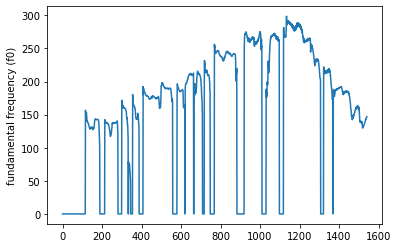

In [238]:
%matplotlib inline

plt.ylabel('fundamental frequency (f0)')
plt.plot(_f0)
plt.show()

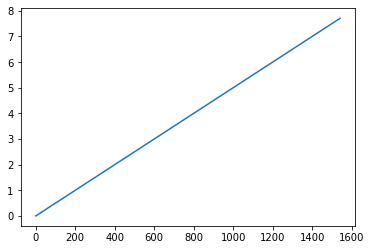

In [239]:
plt.clf()
plt.plot(t)
plt.show()

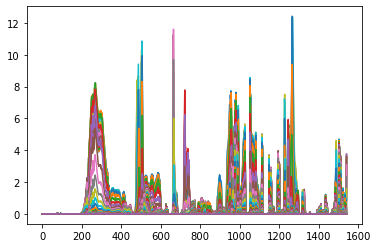

In [240]:
plt.clf()
plt.plot(_sp2)
plt.show()

In [241]:
_sp.shape

(1542, 1025)

In [242]:
_ap.shape

(1542, 1025)

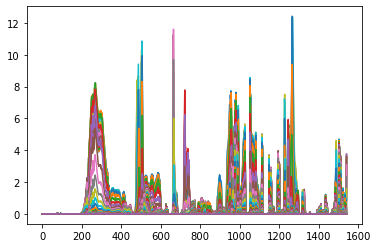

In [244]:
plt.clf()
plt.plot(_sp2)
plt.show()

In [285]:
import math
_sp_clone = np.copy(_sp2)
# for i in range(40, 900):
#     _sp_clone[:,i] *= 0.1
_f0_clone = np.copy(_f0)
for i in range(0, len(_f0_clone)):
    bucket = math.floor(i/20) % 4
    _f0_clone[i] = (bucket * 50 + 150)*0

_y = pw.synthesize(_f0_clone, _sp_clone, _ap2, fs, frame_period)
ipd.Audio(_y, rate=44_100)

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


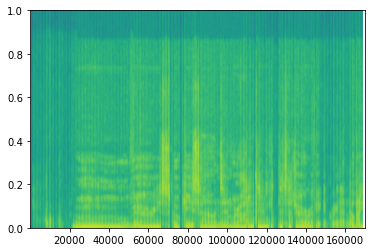

In [282]:
_=plt.specgram(_y)

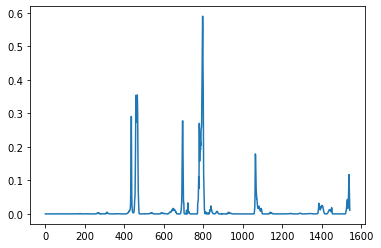

In [175]:
plt.clf()
plt.plot(_sp[:,100])
plt.show()

In [122]:
len(x)

366336

In [123]:
len(x2)

339840